In [146]:
import pandas as pd
import random
import string
import nltk
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk import classify
from nltk import NaiveBayesClassifier

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory




In [147]:
df = pd.read_csv('winemag-data-130k-v2.csv')

In [148]:
df.tail()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [150]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [ ]:
#Top 10 Countries for Wine Review Points

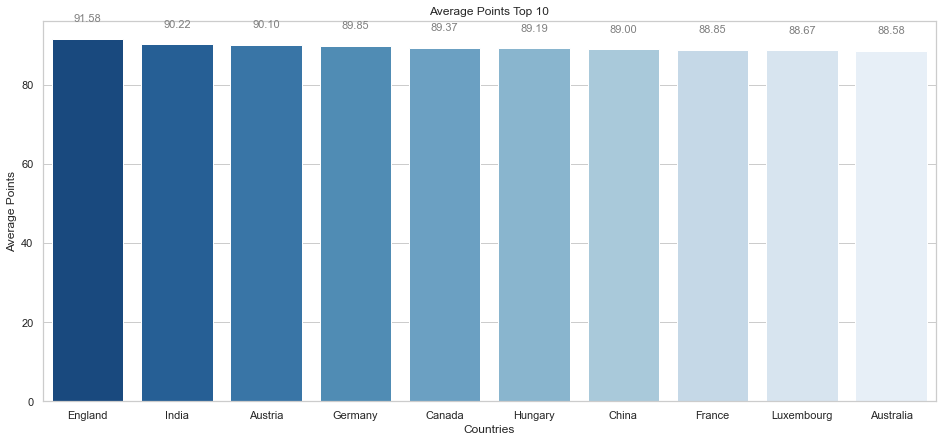

In [151]:
plt.figure(figsize=(16,7))
g = sns.barplot(x=df.groupby("country").mean().sort_values(by="points",ascending=False).price.index[:10], y=df.groupby("country").mean().sort_values(by="points",ascending=False).points.values[:10], palette="Blues_r")
plt.xlabel("Countries")
plt.ylabel("Average Points")
plt.title("Average Points Top 10")
ax=g
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
plt.show()

In [ ]:
#Top 10 Wine Varieties by Points

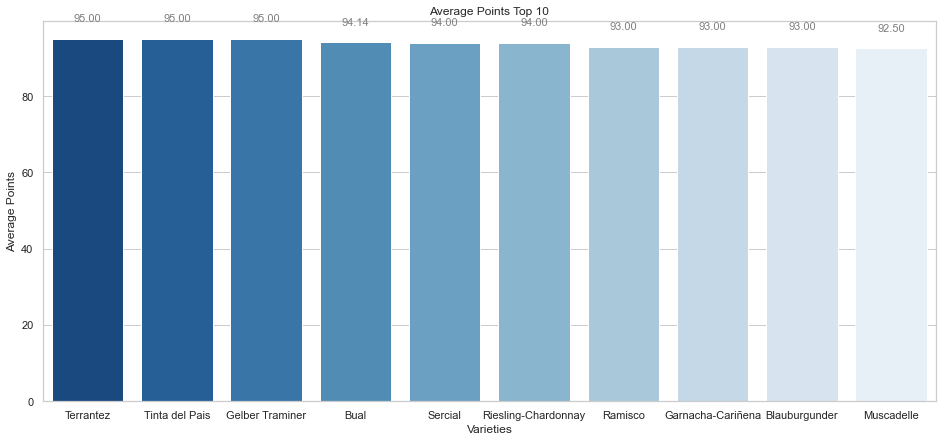

In [152]:
plt.figure(figsize=(16,7))
g = sns.barplot(x=df.groupby("variety").mean().sort_values(by="points",ascending=False).price.index[:10], y=df.groupby("variety").mean().sort_values(by="points",ascending=False).points.values[:10], palette="Blues_r")
plt.xlabel("Varieties")
plt.ylabel("Average Points")
plt.title("Average Points Top 10")
ax=g
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
plt.show()

In [ ]:
#Top 10 Wineries by Points

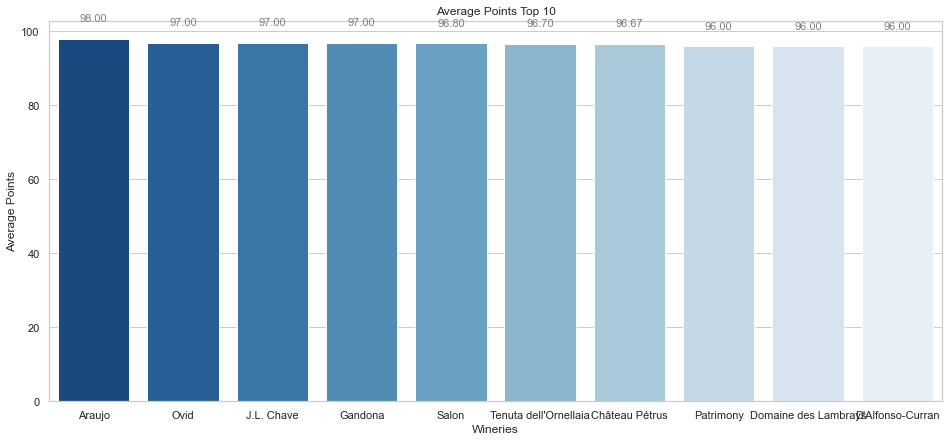

In [153]:
plt.figure(figsize=(16,7))
g = sns.barplot(x=df.groupby("winery").mean().sort_values(by="points",ascending=False).price.index[:10], y=df.groupby("winery").mean().sort_values(by="points",ascending=False).points.values[:10], palette="Blues_r")
plt.xlabel("Wineries")
plt.ylabel("Average Points")
plt.title("Average Points Top 10")
ax=g
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
plt.show()

In [ ]:
#Top 10 Best Bang For Your Buck Countries (Best Quality for the Best Price)

/var/folders/dd/59bv4yb91t75pdwrd6h2qf7w0000gn/T/ipykernel_5498/590207994.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



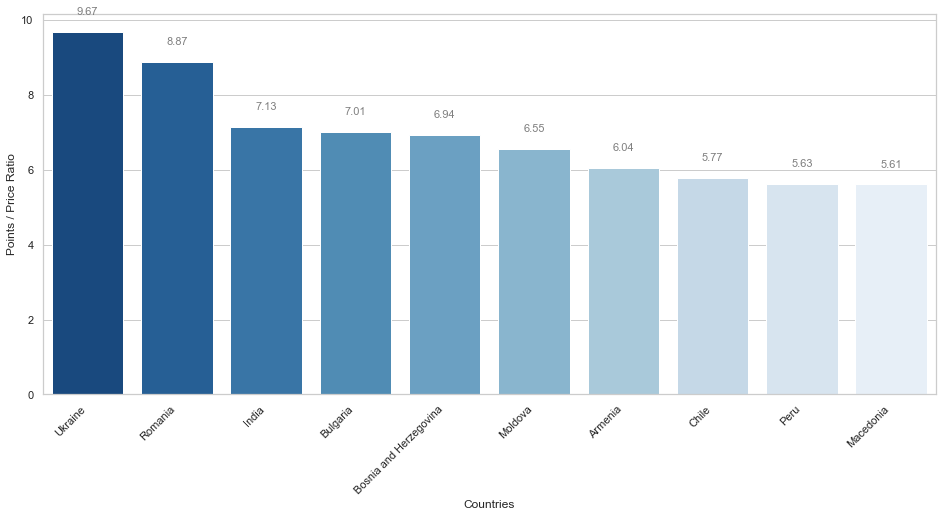

In [154]:
df2 = df[np.isfinite(df["price"])]
df2["points/price"] = df2.points / df2.price
df2.groupby("country").mean().sort_values(by="points/price", ascending=False)

plt.figure(figsize=(16,7))
g = sns.barplot(x=df2.groupby("country").mean().sort_values(by="points/price", ascending=False)["points/price"].index[:10], y=df2.groupby("country").mean().sort_values(by="points/price", ascending=False)["points/price"].values[:10], palette="Blues_r")
plt.xlabel("Countries")
plt.xticks(rotation= 45, ha="right")
plt.ylabel("Points / Price Ratio")
ax=g
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
plt.show()

In [155]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gautamseenivasan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [156]:
df_sentiment = pd.read_csv('winemag-data-130k-v2.csv')

In [ ]:
#Sentiment analysis of wine reviews

In [157]:
sid = SentimentIntensityAnalyzer()
df_sentiment.reset_index(inplace=True, drop=True)
df_sentiment[['neg', 'neu', 'pos', 'compound']] = df_sentiment['description'].apply(sid.polarity_scores).apply(pd.Series)
df_sentiment

df_sentiment["variety"] = df["variety"]

df_sentiment.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,neg,neu,pos,compound
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0.000,0.935,0.065,0.1531
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,0.000,0.868,0.132,0.6486
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,0.053,0.947,0.000,-0.1280
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,0.000,0.926,0.074,0.3400
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0.000,0.805,0.195,0.8176


In [158]:
df_sentiment.dropna()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,neg,neu,pos,compound
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0.000,0.805,0.195,0.8176
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,0.000,0.790,0.210,0.8176
23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,0.051,0.949,0.000,-0.3182
25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,0.000,0.904,0.096,0.4019
35,35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath,0.058,0.752,0.190,0.6293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129919,129919,US,"This ripe, rich, almost decadently thick wine ...",Reserve,91,105.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Nicholas Cole Cellars 2004 Reserve Red (Walla ...,Red Blend,Nicholas Cole Cellars,0.000,0.882,0.118,0.8555
129926,129926,US,This pure Syrah from Reininger's estate vineya...,Ash Hollow Vineyard,91,41.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Reininger 2005 Ash Hollow Vineyard Syrah (Wall...,Syrah,Reininger,0.000,0.860,0.140,0.8555
129945,129945,US,Hailing from one of the more popular vineyards...,Jurassic Park Vineyard Old Vines,90,20.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino,0.091,0.879,0.030,-0.6327
129949,129949,US,There's no bones about the use of oak in this ...,Barrel Fermented,90,35.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs,0.040,0.844,0.116,0.6249


In [ ]:
#Utilizing nltk in order to find word frequency/importance 

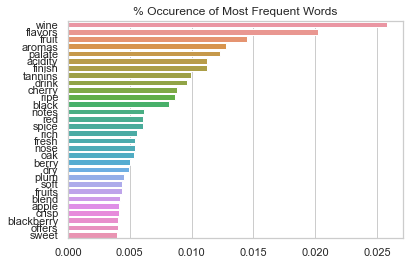

In [183]:
import seaborn as sns 
import matplotlib.pyplot as plt
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize


data = pd.read_csv("winemag-data-130k-v2.csv", index_col = False)
# set seaborn style 
sns.set(style="whitegrid")

stopwords = set(stopwords.words('english'))
# Detokenizer combines tokenized elements
detokenizer = TreebankWordDetokenizer()

def clean_description(desc):
    desc = word_tokenize(desc.lower())
    desc = [token for token in desc if token not in stopwords and token.isalpha()]
    return detokenizer.detokenize(desc)

data["cleaned_description"] = data["description"].apply(clean_description)

word_occurrence = data["cleaned_description"].str.split(expand=True).stack().value_counts()

total_words = sum(word_occurrence)

# plot most common words 

top_words = word_occurrence[:30]/total_words

ax = sns.barplot(x = top_words.values, y = top_words.index)

# Setting title 
ax.set_title("% Occurence of Most Frequent Words")

plt.show()

In [ ]:
#Sentiment dataframes of top words in reviews. 
#to be used for analysis and recommendations
#if a customer cares more about fruityness of the wine, 
#this analysis allows us to recommend Pinot Gris in this case, where the sentiment of the reviews containing "fruit" 
#is filtered to .9+, and the variety with the best sentiment and most frequent, important occurence regarding fruit is Pinot Noir.
#Scroll down to good_fruit["Variety"].describe() for more info 

In [233]:
df_fruit = pd.DataFrame(data["description"].str.contains("fruit"))

df_fruit = df_fruit[df_fruit['description'] == True]

df_fruit["description"] = data["description"]
df_fruit["Sentiment Score"] = df_sentiment["compound"]
df_fruit["Variety"] = df_sentiment["variety"] 

df_fruit.head()

df_fruit["Sentiment Score"].mean()

0.5357878497937912

In [234]:
df_fruit.tail()

,description,Sentiment Score,Variety
129965,"While it's rich, this beautiful dry wine also ...",0.8564,Pinot Gris
129966,Notes of honeysuckle and cantaloupe sweeten th...,0.7331,Riesling
129967,Citation is given as much as a decade of bottl...,0.5267,Pinot Noir
129968,Well-drained gravel soil gives this wine its c...,0.1548,Gewürztraminer
129970,"Big, rich and off-dry, this is powered by inte...",0.7003,Gewürztraminer


In [235]:
df_aromas = pd.DataFrame(df_sentiment["description"].str.contains("aromas"))

df_aromas = df_aromas[df_aromas['description'] == True]

df_aromas["description"] = df_sentiment["description"]
df_aromas["Sentiment Score"] = df_sentiment["compound"]

df_aromas.head()

df_aromas["Sentiment Score"].mean()

0.4261238258386706

In [236]:
df_palate = pd.DataFrame(df_sentiment["description"].str.contains("palate"))

df_palate = df_palate[df_palate['description'] == True]

df_palate["description"] = df_sentiment["description"]
df_palate["Sentiment Score"] = df_sentiment["compound"]

df_palate.head()

df_palate["Sentiment Score"].mean()

0.4426768004737622

In [237]:
df_palate.tail(100)

,description,Sentiment Score
129600,"Medium bodied and restrained on the palate, th...",-0.0516
129601,"Mandarin-orange zest, cut Asian pear, lemon bl...",0.4019
129602,Made with 90% Cabernet Sauvignon and 10% Caber...,0.4215
129603,"This wine is a big one, going all out to make ...",0.7506
129611,Darkly toasted oak lends a veil of smoke and c...,0.0000
...,...,...
129955,"Like Dog Point's 2011 Chardonnay, this wine is...",0.1406
129957,Lightly baked berry aromas vie for attention w...,0.8553
129961,"Intense aromas of wild cherry, baking spice, t...",0.4939
129962,"Blackberry, cassis, grilled herb and toasted a...",0.0000


In [238]:

df_acidity = pd.DataFrame(df_sentiment["description"].str.contains("acidity"))

df_acidity = df_acidity[df_acidity['description'] == True]

df_acidity["description"] = df_sentiment["description"]
df_acidity["Sentiment Score"] = df_sentiment["compound"]

df_acidity.head()

df_acidity["Sentiment Score"].mean()

0.5881271290006779

In [239]:
df_acidity.head()

,description,Sentiment Score
0,"Aromas include tropical fruit, broom, brimston...",0.1531
1,"This is ripe and fruity, a wine that is smooth...",0.6486
2,"Tart and snappy, the flavors of lime flesh and...",-0.1280
5,Blackberry and raspberry aromas show a typical...,0.1655
6,"Here's a bright, informal red that opens with ...",0.6369


In [240]:
df_tannins = pd.DataFrame(df_sentiment["description"].str.contains("tannins"))


df_tannins = df_tannins[df_tannins['description'] == True]

df_tannins["description"] = df_sentiment["description"]
df_tannins["Sentiment Score"] = df_sentiment["compound"]
df_tannins["Variety"] = df_sentiment["variety"] 


df_tannins.head()

df_tannins["Sentiment Score"].mean()

0.497797467927066

In [270]:
filter1 = df_tannins["Sentiment Score"] > .9

good_tannin = df_tannins.loc[filter1]

good_tannin.dropna()

,description,Sentiment Score,Variety
49,"Soft and fruity, this is a generous, ripe wine...",0.9300,Gamay
124,This sophisticated wine is mostly Cabernet Sau...,0.9451,Cabernet Sauvignon
163,Produced from vineyards donated to a charitabl...,0.9648,Gamay
166,"Of course, this 90% Tannat wine is still very ...",0.9349,Tannat-Cabernet
263,"A very good Pinot Noir, rich in cherry, licori...",0.9020,Pinot Noir
...,...,...,...
129684,"This concentrated, full-bodied wine has fine, ...",0.9062,Pinot Noir
129685,The red-juice grape Alicante Bouschet gives a ...,0.9674,Alicante Bouschet
129736,This has the pretty slightly candied flavors o...,0.9743,Pinot Noir
129927,"It's 100% Cabernet Franc, a delightful, bright...",0.9287,Cabernet Franc


In [271]:
good_tannin["Variety"].describe()

count                   3044
unique                   116
top       Cabernet Sauvignon
freq                     514
Name: Variety, dtype: object

In [ ]:
#Here, the nltk gave us tannin as an important word, we then splice though the reviews where Tannin is mentioned
#We then calculate the sentiment analysis scores of the respective tannin reviews
#we now have the remaining recommended varieties that are associated with tannin and respective high-sentiment rated reviews. 
#In this case, Cabernet Sauvignon is the recommendation for people concerned with tannins. 

In [272]:
filter2 = df_fruit["Sentiment Score"] > .9

good_fruit = df_fruit.loc[filter2]

good_fruit.dropna()

,description,Sentiment Score,Variety
8,Savory dried thyme notes accent sunnier flavor...,0.9091,Gewürztraminer
49,"Soft and fruity, this is a generous, ripe wine...",0.9300,Gamay
82,"This fruity, sweet wine is immediately attract...",0.9287,Petit Manseng
119,Medium-gold in color. Complex and inviting nos...,0.9732,Riesling
126,Mid-gold color. Pronounced and enticing aromas...,0.9509,Gewürztraminer
...,...,...,...
129921,There is a select group of under-$20 Malbecs f...,0.9231,Malbec
129927,"It's 100% Cabernet Franc, a delightful, bright...",0.9287,Cabernet Franc
129930,"Arguably on the heavy and rich side, but if yo...",0.9387,Tempranillo Blend
129936,A blend from several premier cru vineyards in ...,0.9081,Pinot Noir


In [273]:
good_fruit["Variety"].describe()

count           7168
unique           255
top       Pinot Noir
freq             834
Name: Variety, dtype: object

In [277]:
good_fruit

,description,Sentiment Score,Variety
8,Savory dried thyme notes accent sunnier flavor...,0.9091,Gewürztraminer
49,"Soft and fruity, this is a generous, ripe wine...",0.9300,Gamay
82,"This fruity, sweet wine is immediately attract...",0.9287,Petit Manseng
119,Medium-gold in color. Complex and inviting nos...,0.9732,Riesling
126,Mid-gold color. Pronounced and enticing aromas...,0.9509,Gewürztraminer
...,...,...,...
129921,There is a select group of under-$20 Malbecs f...,0.9231,Malbec
129927,"It's 100% Cabernet Franc, a delightful, bright...",0.9287,Cabernet Franc
129930,"Arguably on the heavy and rich side, but if yo...",0.9387,Tempranillo Blend
129936,A blend from several premier cru vineyards in ...,0.9081,Pinot Noir


Variety
Agiorgitiko          AxesSubplot(0.125,0.125;0.775x0.755)
Aglianico            AxesSubplot(0.125,0.125;0.775x0.755)
Albariño             AxesSubplot(0.125,0.125;0.775x0.755)
Alfrocheiro          AxesSubplot(0.125,0.125;0.775x0.755)
Alicante Bouschet    AxesSubplot(0.125,0.125;0.775x0.755)
                                     ...                 
Xinomavro            AxesSubplot(0.125,0.125;0.775x0.755)
Zibibbo              AxesSubplot(0.125,0.125;0.775x0.755)
Zierfandler          AxesSubplot(0.125,0.125;0.775x0.755)
Zinfandel            AxesSubplot(0.125,0.125;0.775x0.755)
Zweigelt             AxesSubplot(0.125,0.125;0.775x0.755)
Name: Sentiment Score, Length: 255, dtype: object

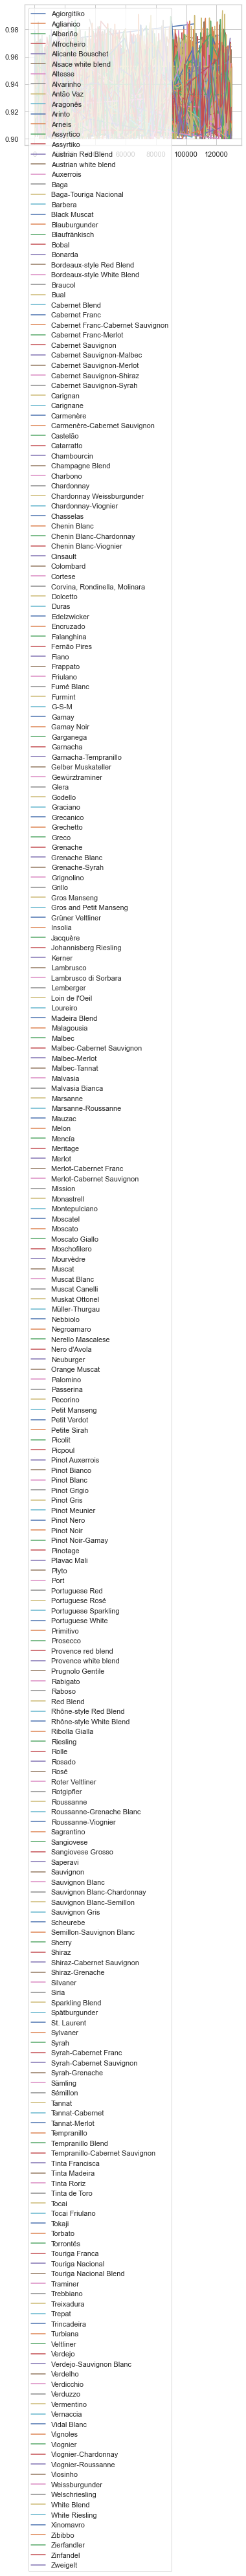